In [7]:
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd 
from sklearn.model_selection import StratifiedKFold , train_test_split , KFold
%matplotlib inline

In [8]:
iris = load_iris()
iris_label = iris.target 
iris_label = iris_label.reshape(len(iris_label),1)
iris_data = iris.data

In [9]:
X_train, X_test, y_train, y_test = train_test_split(iris_data, iris_label, test_size = 0.2, random_state = 11)

In [19]:
import tensorflow as tf

model = tf.keras.Sequential([
    tf.keras.layers.Dense(units = 48, activation = 'relu', input_shape = (4,)),
    tf.keras.layers.Dense(units = 24, activation = 'relu'),
    tf.keras.layers.Dense(units = 12, activation = 'relu'),
    tf.keras.layers.Dense(units = 3, activation = 'softmax')   
    
])

In [20]:
model.compile(optimizer = tf.keras.optimizers.Adam(lr=0.07),
loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [21]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 48)                240       
_________________________________________________________________
dense_6 (Dense)              (None, 24)                1176      
_________________________________________________________________
dense_7 (Dense)              (None, 12)                300       
_________________________________________________________________
dense_8 (Dense)              (None, 3)                 39        
Total params: 1,755
Trainable params: 1,755
Non-trainable params: 0
_________________________________________________________________


In [22]:
history = model.fit(X_train, y_train, epochs = 25, batch_size = 32, validation_split = 0.25)

Train on 90 samples, validate on 30 samples
Epoch 1/25
90/90 [==============================] - 0s 5ms/sample - loss: 2.2714 - accuracy: 0.3889 - val_loss: 1.2595 - val_accuracy: 0.5667
Epoch 2/25
90/90 [==============================] - 0s 89us/sample - loss: 1.2044 - accuracy: 0.4889 - val_loss: 1.1836 - val_accuracy: 0.2333
Epoch 3/25
90/90 [==============================] - 0s 78us/sample - loss: 1.1031 - accuracy: 0.3667 - val_loss: 1.1236 - val_accuracy: 0.3333
Epoch 4/25
90/90 [==============================] - 0s 78us/sample - loss: 1.1122 - accuracy: 0.4333 - val_loss: 1.0607 - val_accuracy: 0.2333
Epoch 5/25
90/90 [==============================] - 0s 78us/sample - loss: 1.0396 - accuracy: 0.3778 - val_loss: 1.0996 - val_accuracy: 0.2333
Epoch 6/25
90/90 [==============================] - 0s 89us/sample - loss: 0.9133 - accuracy: 0.5667 - val_loss: 0.9796 - val_accuracy: 0.5667
Epoch 7/25
90/90 [==============================] - 0s 78us/sample - loss: 0.6803 - accuracy: 0.677

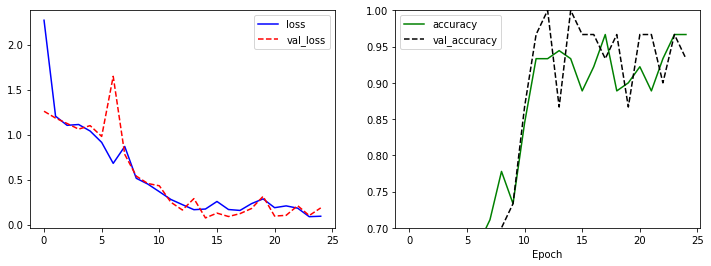

In [24]:
import matplotlib.pyplot as plt
plt.figure(figsize = (12,4))
plt.subplot(1,2,1)
plt.plot(history.history['loss'],'b-',label = 'loss')
plt.plot(history.history['val_loss'],'r--', label = 'val_loss')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['accuracy'], 'g-', label = 'accuracy')
plt.plot(history.history['val_accuracy'],'k--', label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylim(0.7,1)
plt.legend()
plt.show()